In [120]:
import pandas as pd
import numpy as np
from pymongo import MongoClient

import json

from pprint import pprint

import datetime

import matplotlib.pyplot as plt



with open("passwd_pochta_mongo.txt") as file:  
    data = json.load(file)


In [175]:
# df = pd.read_excel("Датасет_Почта/Батч 1.xlsx")
# df = pd.read_excel("Датасет_Почта/Батч 2.xlsx")
# df = pd.read_excel("Датасет_Почта/Батч 3.xlsx")
# df = pd.read_excel("Датасет_Почта/Батч 4.xlsx")
# df = pd.read_excel("Датасет_Почта/Батч 5.xlsx")
df.columns = ["hid", "date", "index_from", "index_to", "weight", "cost", "cost_oc", "cost_np", "no_blank", "banderol", "fast", "world", "with_cost", "with_payment", "with_descr", "with_warning", "sms_client", "sms_reciever"]
df

,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,banderol,fast,world,with_cost,with_payment,with_descr,with_warning,sms_client,sms_reciever
0,16fdcc26-f494-40a5-97aa-4d690d73f068,2020-07-27 10:02:35.229000,399850,141180,7040.0,502.00,NaN,NaN,True,False,False,False,False,False,False,NaN,False,False
1,163368f2-2b20-4cff-b13a-416882e41764,2020-07-28 08:30:00.964000,347905,346506,550.0,216.00,NaN,NaN,False,False,False,False,False,False,False,NaN,False,False
2,167db3db-7c11-45aa-b410-bf5703956c33,2020-07-28 08:30:06.143000,156014,692254,340.0,455.43,2100.0,2100.0,True,False,False,False,True,True,False,NaN,False,False
3,172c124a-e4c3-423b-b310-84587e5cd428,2020-07-28 08:30:07.211000,614010,396005,300.0,264.00,NaN,NaN,True,False,False,False,False,False,False,NaN,False,False
4,15f14043-87ff-4cc1-94ee-b5ab29355db9,2020-07-28 09:33:46.828000,680000,454045,500.0,350.00,NaN,NaN,True,False,True,False,False,False,False,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195267,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996000,400074,603140,5196.0,513.00,NaN,NaN,True,False,NaN,False,False,False,False,NaN,False,False
195268,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642000,412540,665102,668.0,455.00,NaN,NaN,True,False,True,False,False,False,False,NaN,False,False
195269,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358000,600000,150042,200.0,230.00,NaN,NaN,True,False,True,False,False,False,False,NaN,False,False
195270,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062000,363120,356805,575.0,414.00,NaN,NaN,True,False,True,False,False,False,False,NaN,False,False


In [176]:
records = json.loads(df.T.to_json()).values()

In [177]:
client = MongoClient(data['server'],
username=data['login'],
password=data['password'],
authSource='pochtaru')

db = client.pochtaru

print(db.list_collection_names())

x = db.clients2.insert(records)
client.close()

['holyday_dates', 'report_dates', 'regions', 'clients2', 'clients']


F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  # Remove the CWD from sys.path while we load stuff.


In [179]:
client = MongoClient(data['server'],
username=data['login'],
password=data['password'],
authSource='pochtaru')

db = client.pochtaru

print(db.list_collection_names())

df = pd.DataFrame(list(db.clients2.find()))

client.close()

['holyday_dates', 'report_dates', 'regions', 'clients2', 'clients']


In [180]:
df

,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,banderol,fast,world,with_cost,with_payment,with_descr,with_warning,sms_client,sms_reciever
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,NaN,NaN,False,False,True,False,False,False,False,None,False,False
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,NaN,NaN,True,False,False,False,False,False,False,None,False,False
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,NaN,NaN,False,False,False,False,False,False,False,None,False,False
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,NaN,NaN,False,False,False,False,False,False,False,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944562,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996000,400074,603140,5196.0,513.0,NaN,NaN,True,False,None,False,False,False,False,None,False,False
944563,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642000,412540,665102,668.0,455.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False
944564,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358000,600000,150042,200.0,230.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False
944565,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062000,363120,356805,575.0,414.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False


In [183]:
# ограничим 4гр
df_n = df[df["weight"] > 4]
df_n

,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,banderol,fast,world,with_cost,with_payment,with_descr,with_warning,sms_client,sms_reciever
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,NaN,NaN,False,False,True,False,False,False,False,None,False,False
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,NaN,NaN,True,False,False,False,False,False,False,None,False,False
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,NaN,NaN,False,False,False,False,False,False,False,None,False,False
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,NaN,NaN,False,False,False,False,False,False,False,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944562,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996000,400074,603140,5196.0,513.0,NaN,NaN,True,False,None,False,False,False,False,None,False,False
944563,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642000,412540,665102,668.0,455.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False
944564,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358000,600000,150042,200.0,230.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False
944565,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062000,363120,356805,575.0,414.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False


In [184]:
df_n["gramm"] = df_n["cost"] / df_n["weight"]

# df_n['date'] = pd.to_datetime(df_n['date'], dayfirst=True)
# df_n['date_ts'] = df_n['date'].apply(lambda x: datetime.datetime.timestamp(x))
# df_n['date_weekday'] = df_n['date_ts'].apply(lambda x: datetime.datetime.fromtimestamp(x).weekday())

# Monday is 0 and Sunday is 6
# datetime.datetime.fromtimestamp(df['date_ts'][1]).weekday()
# datetime.datetime.today().weekday()

df_n

F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,banderol,fast,world,with_cost,with_payment,with_descr,with_warning,sms_client,sms_reciever,gramm
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,NaN,NaN,False,False,True,False,False,False,False,None,False,False,1.730000
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,NaN,NaN,True,False,False,False,False,False,False,None,False,False,0.216364
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False,1.730000
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,NaN,NaN,False,False,False,False,False,False,False,None,False,False,0.160477
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,NaN,NaN,False,False,False,False,False,False,False,None,False,False,0.177428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944562,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996000,400074,603140,5196.0,513.0,NaN,NaN,True,False,None,False,False,False,False,None,False,False,0.098730
944563,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642000,412540,665102,668.0,455.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False,0.681138
944564,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358000,600000,150042,200.0,230.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False,1.150000
944565,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062000,363120,356805,575.0,414.0,NaN,NaN,True,False,True,False,False,False,False,None,False,False,0.720000


In [185]:
df_reg = pd.read_csv("ruregiondb.csv", encoding='1251', sep=';')
df_reg.drop(["ГИБДД", "ОКАТО", "ОКТМО", "ISO-3166-2", "ГОСТ 7.67-2003"], axis=1, inplace=True)
df_reg.columns = ["region", "code", "post_serial"]
df_reg

,region,code,post_serial
0,Республика Адыгея,1,385
1,Республика Алтай,4,649
2,Республика Башкортостан,2,"450,451,452,453"
3,Республика Бурятия,3,"670,671"
4,Республика Дагестан,5,"367,368"
...,...,...,...
80,Еврейская автономная область,79,679
81,Ненецкий автономный округ,83,166
82,Ханты-Мансийский автономный округ - Югра,86,628
83,Чукотский автономный округ,87,689


In [186]:
df_n['index_from'] = df_n['index_from'].apply(str)
df_n['index_to'] = df_n['index_to'].apply(str)

df_n.info()

F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 941878 entries, 0 to 944566
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   _id           941878 non-null  object 
 1   hid           941878 non-null  object 
 2   date          941878 non-null  object 
 3   index_from    941878 non-null  object 
 4   index_to      941878 non-null  object 
 5   weight        941878 non-null  float64
 6   cost          941804 non-null  float64
 7   cost_oc       242776 non-null  float64
 8   cost_np       121896 non-null  float64
 9   no_blank      941878 non-null  bool   
 10  banderol      941126 non-null  object 
 11  fast          927623 non-null  object 
 12  world         941878 non-null  bool   
 13  with_cost     941126 non-null  object 
 14  with_payment  941878 non-null  bool   
 15  with_descr    941126 non-null  object 
 16  with_warning  4575 non-null    object 
 17  sms_client    941138 non-null  object 
 18  sms_

In [187]:
df_n["post_code_from"] = df_n["index_from"].apply(lambda x: x[:3])
df_n["post_code_to"] = df_n["index_to"].apply(lambda x: x[:3])

df_n

F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,...,world,with_cost,with_payment,with_descr,with_warning,sms_client,sms_reciever,gramm,post_code_from,post_code_to
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,NaN,NaN,False,...,False,False,False,False,None,False,False,1.730000,109,107
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,NaN,NaN,True,...,False,False,False,False,None,False,False,0.216364,390,125
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,NaN,NaN,True,...,False,False,False,False,None,False,False,1.730000,111,670
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,NaN,NaN,False,...,False,False,False,False,None,False,False,0.160477,105,183
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,NaN,NaN,False,...,False,False,False,False,None,False,False,0.177428,195,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944562,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996000,400074,603140,5196.0,513.0,NaN,NaN,True,...,False,False,False,False,None,False,False,0.098730,400,603
944563,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642000,412540,665102,668.0,455.0,NaN,NaN,True,...,False,False,False,False,None,False,False,0.681138,412,665
944564,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358000,600000,150042,200.0,230.0,NaN,NaN,True,...,False,False,False,False,None,False,False,1.150000,600,150
944565,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062000,363120,356805,575.0,414.0,NaN,NaN,True,...,False,False,False,False,None,False,False,0.720000,363,356


In [188]:
def set_postserial(x):
    ret = 0
    if df_reg["post_serial"].str.contains(x).any():
        ret = df_reg[df_reg["post_serial"].str.contains(x)].iloc[0]['code']
    return ret

# df['reg_code_from'] = df['post_code_from'].apply(lambda x: df_reg[df_reg["post_serial"].str.contains(x)].iloc[0]['code'])
# df['reg_code_to'] = df['post_code_to'].apply(lambda x: df_reg[df_reg["post_serial"].str.contains(x)].iloc[0]['code'])

df_n['reg_code_from'] = df_n['post_code_from'].apply(set_postserial)
df_n['reg_code_to'] = df_n['post_code_to'].apply(set_postserial)

df_n['inner_post'] = np.where(df_n['reg_code_from'] == df_n['reg_code_to'], True, False)

df_n


F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,...,with_descr,with_warning,sms_client,sms_reciever,gramm,post_code_from,post_code_to,reg_code_from,reg_code_to,inner_post
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,NaN,NaN,False,...,False,None,False,False,1.730000,109,107,77,77,True
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,NaN,NaN,True,...,False,None,False,False,0.216364,390,125,62,77,False
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,NaN,NaN,True,...,False,None,False,False,1.730000,111,670,77,3,False
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,NaN,NaN,False,...,False,None,False,False,0.160477,105,183,77,51,False
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,NaN,NaN,False,...,False,None,False,False,0.177428,195,184,78,51,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944562,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996000,400074,603140,5196.0,513.0,NaN,NaN,True,...,False,None,False,False,0.098730,400,603,34,52,False
944563,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642000,412540,665102,668.0,455.0,NaN,NaN,True,...,False,None,False,False,0.681138,412,665,64,38,False
944564,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358000,600000,150042,200.0,230.0,NaN,NaN,True,...,False,None,False,False,1.150000,600,150,33,76,False
944565,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062000,363120,356805,575.0,414.0,NaN,NaN,True,...,False,None,False,False,0.720000,363,356,15,26,False


In [217]:
# Сохраняем чтобы не считывать заново из бд
# df.to_pickle("./pochta_prepare_all.pkl")
# df_n.to_pickle("./pochta_prepare.pkl")

In [2]:
# Загружаем дополненный датасет
df_n = pd.read_pickle("./pochta_prepare.pkl")
df_n

,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,...,with_descr,with_warning,sms_client,sms_reciever,gramm,post_code_from,post_code_to,reg_code_from,reg_code_to,inner_post
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,NaN,NaN,False,...,False,None,False,False,1.730000,109,107,77,77,True
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,NaN,NaN,True,...,False,None,False,False,0.216364,390,125,62,77,False
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,NaN,NaN,True,...,False,None,False,False,1.730000,111,670,77,3,False
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,NaN,NaN,False,...,False,None,False,False,0.160477,105,183,77,51,False
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,NaN,NaN,False,...,False,None,False,False,0.177428,195,184,78,51,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944562,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996000,400074,603140,5196.0,513.0,NaN,NaN,True,...,False,None,False,False,0.098730,400,603,34,52,False
944563,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642000,412540,665102,668.0,455.0,NaN,NaN,True,...,False,None,False,False,0.681138,412,665,64,38,False
944564,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358000,600000,150042,200.0,230.0,NaN,NaN,True,...,False,None,False,False,1.150000,600,150,33,76,False
944565,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062000,363120,356805,575.0,414.0,NaN,NaN,True,...,False,None,False,False,0.720000,363,356,15,26,False


In [206]:
# Смотрим все ли регионы прописались
df_n[df_n["reg_code_from"] == 0]

,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,...,with_descr,with_warning,sms_client,sms_reciever,gramm,post_code_from,post_code_to,reg_code_from,reg_code_to,inner_post
1566,5f40266248a87841ef75573f,16e8ddc6-f72d-405a-88da-d944e2f28ec3,2020-07-05 08:44:57.153000,601204,600022,3000.0,304.00,NaN,NaN,True,...,False,None,False,False,0.101333,601,600,0,33,False
1568,5f40266248a87841ef755741,16e8ddc6-f72d-405a-88da-d944e2f28ec3,2020-07-05 08:45:43.482000,601204,600022,3000.0,304.00,NaN,NaN,True,...,False,None,False,False,0.101333,601,600,0,33,False
1570,5f40266248a87841ef755743,16e8ddc6-f72d-405a-88da-d944e2f28ec3,2020-07-05 08:46:25.293000,601204,600022,3000.0,304.00,NaN,NaN,True,...,False,None,False,False,0.101333,601,600,0,33,False
1577,5f40266248a87841ef75574a,16e8ddc6-f72d-405a-88da-d944e2f28ec3,2020-07-05 08:47:01.083000,601204,600022,3000.0,304.00,NaN,NaN,True,...,False,None,False,False,0.101333,601,600,0,33,False
1578,5f40266248a87841ef75574b,16e8ddc6-f72d-405a-88da-d944e2f28ec3,2020-07-05 08:47:37.026000,601204,600022,3000.0,304.00,NaN,NaN,True,...,False,None,False,False,0.101333,601,600,0,33,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943645,5f402ad248a87841ef83b742,16eb3333-0733-46c3-be34-75a76434be09,2020-07-30 14:42:15.733000,601506,393760,2000.0,260.00,NaN,NaN,True,...,False,None,False,False,0.130000,601,393,0,68,False
943854,5f402ad248a87841ef83b813,1726fdbe-51b7-4d5d-b31f-99a1615575c1,2020-07-30 14:44:09.888000,601652,601384,91.0,173.00,NaN,NaN,True,...,False,None,False,False,1.901099,601,601,0,0,True
944014,5f402ad248a87841ef83b8b3,16daf182-cf2e-47aa-8d70-2e1e072f0842,2020-07-30 14:48:45.961000,601422,196655,2650.0,392.07,100.0,NaN,True,...,False,None,False,False,0.147951,601,196,0,78,False
944159,5f402ad248a87841ef83b944,167f42ba-20d0-4587-a347-df2a48e13587,2020-07-30 14:49:04.721000,606120,108822,500.0,495.03,7400.0,7400.0,True,...,False,None,False,False,0.990060,606,108,0,77,False


In [3]:
df_n['date'] = pd.to_datetime(df_n['date'], dayfirst=False)
df_n['date_ts'] = df_n['date'].apply(lambda x: datetime.datetime.timestamp(x))
df_n['date_weekday'] = df_n['date_ts'].apply(lambda x: datetime.datetime.fromtimestamp(x).weekday())
df_n

,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,...,sms_client,sms_reciever,gramm,post_code_from,post_code_to,reg_code_from,reg_code_to,inner_post,date_ts,date_weekday
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036,109469,107241,100.0,173.0,NaN,NaN,False,...,False,False,1.730000,109,107,77,77,True,1.593896e+09,6
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229,390039,125284,1100.0,238.0,NaN,NaN,True,...,False,False,0.216364,390,125,62,77,False,1.593897e+09,6
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671,111250,670033,100.0,173.0,NaN,NaN,True,...,False,False,1.730000,111,670,77,3,False,1.593897e+09,6
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965,105173,183035,2262.0,363.0,NaN,NaN,False,...,False,False,0.160477,105,183,77,51,False,1.593897e+09,6
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474,195197,184209,1905.0,338.0,NaN,NaN,False,...,False,False,0.177428,195,184,78,51,False,1.593897e+09,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944562,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996,400074,603140,5196.0,513.0,NaN,NaN,True,...,False,False,0.098730,400,603,34,52,False,1.596092e+09,3
944563,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642,412540,665102,668.0,455.0,NaN,NaN,True,...,False,False,0.681138,412,665,64,38,False,1.596092e+09,3
944564,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358,600000,150042,200.0,230.0,NaN,NaN,True,...,False,False,1.150000,600,150,33,76,False,1.596092e+09,3
944565,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062,363120,356805,575.0,414.0,NaN,NaN,True,...,False,False,0.720000,363,356,15,26,False,1.596092e+09,3


In [237]:
# Количество отправок у пользователя
df_cnt = df_n.groupby("hid")["index_from"].count().reset_index(name='count').sort_values(['count'], ascending=False)
df_cnt.head(20)

df_cnt["count"].describe()
# => считаем менее 3 отправок как не частые

count    62074.000000
mean        15.173470
std         51.535651
min          1.000000
25%          1.000000
50%          3.000000
75%         11.000000
max       4690.000000
Name: count, dtype: float64

In [238]:
# Дополняем датасет количеством отправок у пользователя
df_n = pd.merge(df_n, df_cnt, how='left', on=['hid', 'hid'])
df_n

,_id,hid,date,index_from,index_to,weight,cost,cost_oc,cost_np,no_blank,...,sms_reciever,gramm,post_code_from,post_code_to,reg_code_from,reg_code_to,inner_post,date_ts,date_weekday,count
0,5f40266248a87841ef755121,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036,109469,107241,100.0,173.0,NaN,NaN,False,...,False,1.730000,109,107,77,77,True,1.593896e+09,6,3
1,5f40266248a87841ef755122,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229,390039,125284,1100.0,238.0,NaN,NaN,True,...,False,0.216364,390,125,62,77,False,1.593897e+09,6,2
2,5f40266248a87841ef755123,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671,111250,670033,100.0,173.0,NaN,NaN,True,...,False,1.730000,111,670,77,3,False,1.593897e+09,6,13
3,5f40266248a87841ef755124,8182829,2020-07-05 00:12:50.965,105173,183035,2262.0,363.0,NaN,NaN,False,...,False,0.160477,105,183,77,51,False,1.593897e+09,6,4
4,5f40266248a87841ef755125,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474,195197,184209,1905.0,338.0,NaN,NaN,False,...,False,0.177428,195,184,78,51,False,1.593897e+09,6,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941873,5f402ad248a87841ef83bad7,16d3e18e-85cf-4d24-896d-f4f4562cd8b5,2020-07-30 09:58:38.996,400074,603140,5196.0,513.0,NaN,NaN,True,...,False,0.098730,400,603,34,52,False,1.596092e+09,3,18
941874,5f402ad248a87841ef83bad8,158ee2a0-9dbb-4020-92ee-0649f7668ff2,2020-07-30 09:58:44.642,412540,665102,668.0,455.0,NaN,NaN,True,...,False,0.681138,412,665,64,38,False,1.596092e+09,3,106
941875,5f402ad248a87841ef83bad9,165c73f9-7ada-41ca-8926-1cebdfdb830f,2020-07-30 09:58:46.358,600000,150042,200.0,230.0,NaN,NaN,True,...,False,1.150000,600,150,33,76,False,1.596092e+09,3,35
941876,5f402ad248a87841ef83bada,16d1f9d8-ab52-4f33-a735-96ce00ed8acf,2020-07-30 09:57:27.062,363120,356805,575.0,414.0,NaN,NaN,True,...,False,0.720000,363,356,15,26,False,1.596092e+09,3,38


In [ ]:
quant = pd.DataFrame(df.groupby(["id", "reg_code_from"]).count()["date"])
quant

In [ ]:
print(quant["date"].min())
print(quant["date"].quantile(0.05))

,cost
reg_code_from,
5,216.0
7,274.0
20,274.0
36,282.0
62,288.0
...,...
89,683.0
41,724.0
65,738.0


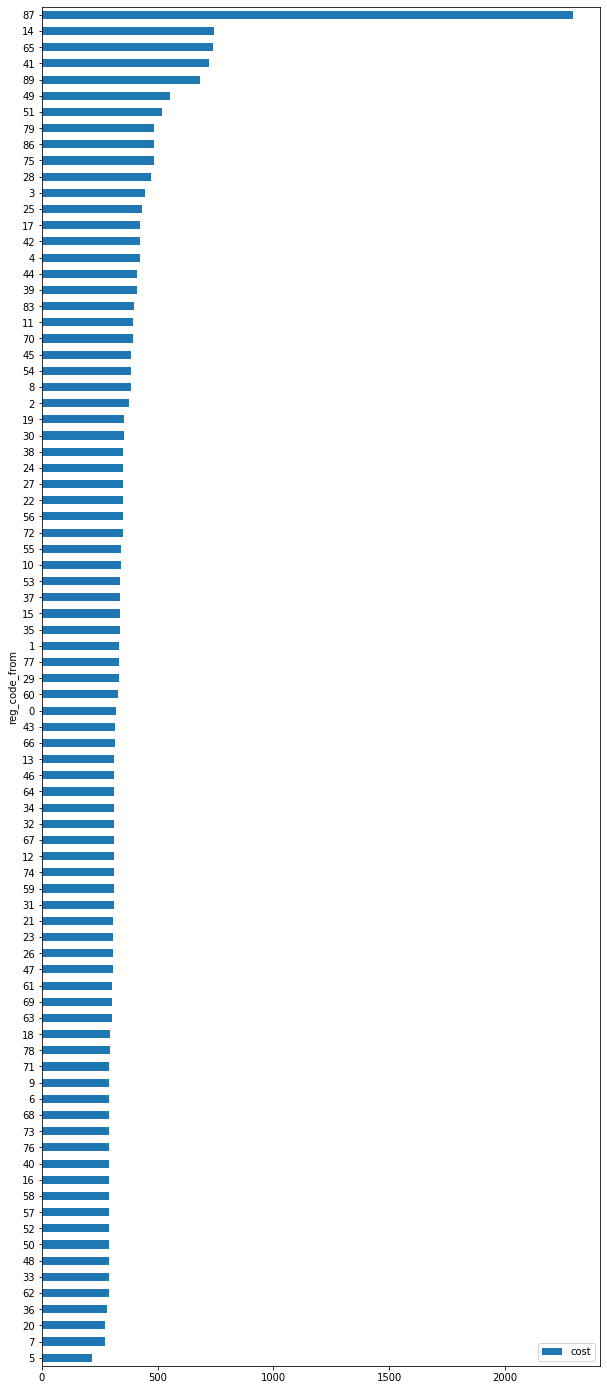

In [204]:
# График по медианной стоимости посылки в регионе
df_n["reg_code_from"].median()
df_bar = df_n.groupby(df_n.reg_code_from)[['cost']].median().sort_values(['cost'], ascending=True)
ax = df_bar.plot.barh(y='cost', rot=0, figsize=(10,25))

df_bar

F:\NeuralNetwork\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:572: UserWarning: The handle <BarContainer object of 84 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


,_id
reg_code_from,
49,1.621622
87,3.000000
41,4.520548
83,4.700000
17,5.409091
...,...
5,21.470752
2,21.536287
11,21.923729


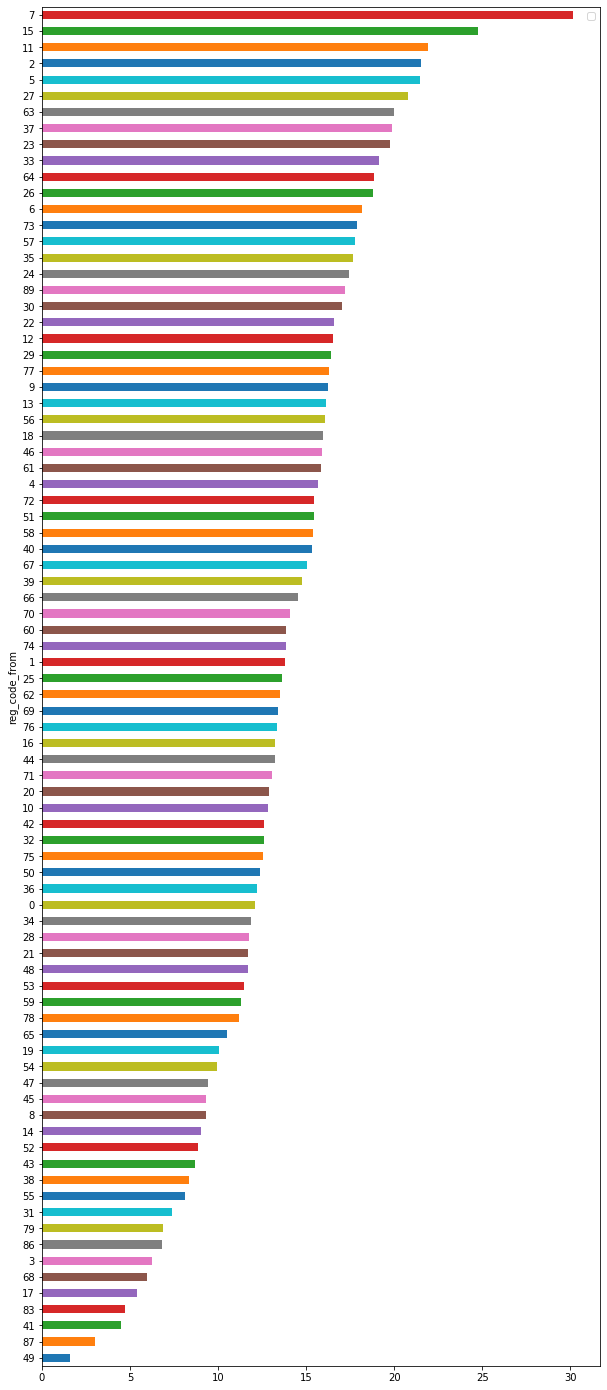

In [4]:
# График со средним количеством отправок на пользователя (по регионам)
# df["reg_code_from"].median()
df_bar = pd.DataFrame(df_n.groupby(["reg_code_from", "hid"]).count()["_id"])
df_bar = df_bar.groupby("reg_code_from").mean().sort_values(['_id'], ascending=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax = df_bar.plot.barh(y='_id', rot=0, color=colors, figsize=(10,25))
df_bar

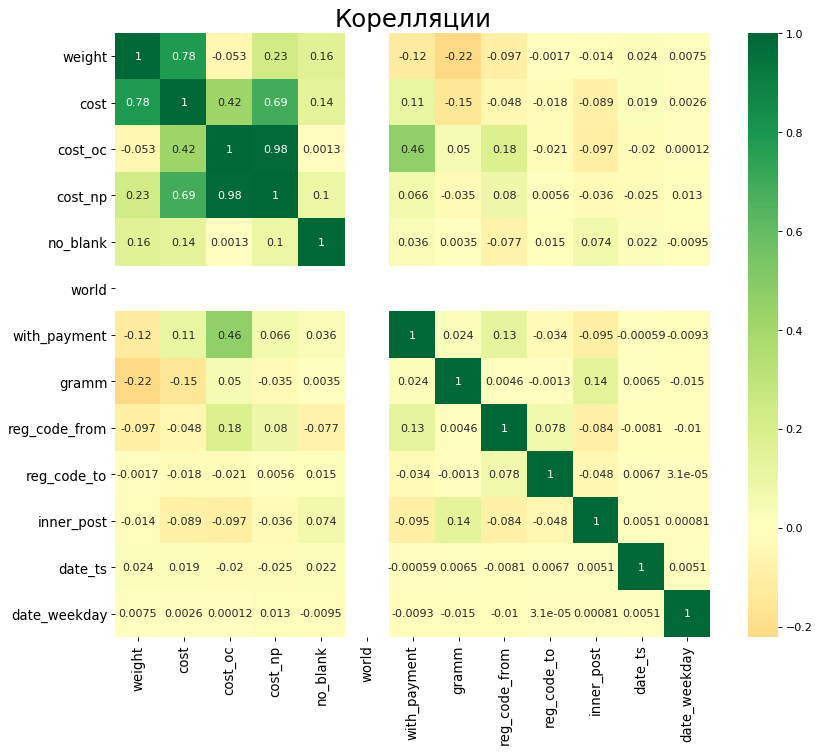

In [8]:
import seaborn as sns

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_n.corr(), xticklabels=df_n.corr().columns, yticklabels=df_n.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корелляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Выбранные классы
# 1 - Фирмачи - Частые отправки предположительно > 25% квантиля
# 2 - Авантюристы - частые и дорогие (выше средней стоимости за объявленную ценность) отправки (либо большого веса) и без страховки, либо с отметкой осторожно и без страховки
# 3 - Пчелы - частые отправки из разных отделений
# 4 - Местные - частые отправки внутри региона
# 5 - Дальнобои - отправки в другие регионы

In [240]:
# df_n

In [295]:
# Проводим классификацию

from sklearn.model_selection import train_test_split

df_classif = df_n.copy(deep=True)

df_classif = df_classif.drop(["date", "_id"], axis=1)

convert_dict = {'index_from': int,
                'index_to': int,
                'post_code_from': int,
                'post_code_to': int                
               } 
  
df_classif = df_classif.astype(convert_dict)


# # для теста с рандомными значениями
# # df_classif['Label1'] = np.random.randint(0, 2, df_classif.shape[0])
# # df_classif['Label2'] = np.random.randint(0, 2, df_classif.shape[0])
# # df_classif['Label3'] = np.random.randint(0, 2, df_classif.shape[0])
# # df_classif['Label4'] = np.random.randint(0, 2, df_classif.shape[0])
# # df_classif['Label5'] = np.random.randint(0, 2, df_classif.shape[0])


df_classif['Label1'] = np.where(df_classif['count'] > 7, 1, 0)
df_classif['Label2'] = np.where((df_classif['count'] > 3) & (df_classif['cost'] > 120) & ((df_classif['cost_oc'] == False) | (df_classif['with_warning'] == True)), 1, 0)
df_classif['Label3'] = np.where((df_classif['inner_post'] == False) & (df_classif['count'] > 3), 1, 0)
df_classif['Label4'] = np.where((df_classif['inner_post'] == True) & (df_classif['count'] > 3), 1, 0)
df_classif['Label5'] = np.where((df_classif['inner_post'] == False), 1, 0)


# # df_classif = df_classif[df_classif['gramm'] > 0]
df_classif.fillna(0, inplace=True)

# df_classif_hid = pd.DataFrame(df_classif['hid'])
# df_classif_hid['mid'] = np.arange(len(df_classif_hid))

# df_classif.drop(['hid'], axis=1, inplace=True)
# # df_classif['mid'] = np.arange(len(df_classif))

# df_classif = df_classif[df_classif['Label1'] | df_classif['Label2'] | df_classif['Label3'] | df_classif['Label4'] | df_classif['Label5'] == True]

# # Убираем поля из которых уже получили нужную инфо
df_classif.drop(['index_from', 'index_to', 'reg_code_from', 'reg_code_to', 'post_code_from', 'post_code_to', 'date_ts', 'date_weekday'], axis=1, inplace=True)

df_classif = df_classif.groupby('hid').mean()

df_classif['Label1'] = np.where(round(df_classif['Label1']) == 1, 1, 0)
df_classif['Label2'] = np.where(round(df_classif['Label2']) == 1, 1, 0)
df_classif['Label3'] = np.where(round(df_classif['Label3']) == 1, 1, 0)
df_classif['Label4'] = np.where(round(df_classif['Label4']) == 1, 1, 0)
df_classif['Label5'] = np.where(round(df_classif['Label5']) == 1, 1, 0)

df_classif

,weight,cost,cost_oc,cost_np,no_blank,world,with_payment,gramm,inner_post,count,Label1,Label2,Label3,Label4,Label5
hid,,,,,,,,,,,,,,,
300950,330.526316,251.736842,0.000000,0.000000,1.0,0.0,0.000000,0.960716,0.052632,19,1,0,1,0,1
345420,190.000000,230.000000,0.000000,0.000000,0.0,0.0,0.000000,1.210526,0.000000,1,0,0,0,0,1
345660,263.076923,272.412692,428.974359,428.974359,1.0,0.0,0.410256,1.689281,0.000000,78,1,0,1,0,1
345914,65.000000,179.000000,0.000000,0.000000,1.0,0.0,0.000000,2.753846,0.000000,1,0,0,0,0,1
345920,300.000000,356.200000,0.000000,0.000000,0.0,0.0,0.000000,1.187333,0.000000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739f767-078e-4f37-9d63-5ef1bcc20d04,15000.000000,2443.200000,0.000000,0.000000,0.0,0.0,0.000000,0.162880,0.000000,1,0,0,0,0,1
1739f7cc-c33a-4623-9950-1ca38998f1af,379.000000,264.000000,0.000000,0.000000,1.0,0.0,0.000000,0.696570,0.000000,1,0,0,0,0,1
1739f7d1-7057-4124-9dd0-1ee8823806ec,4500.000000,463.000000,0.000000,0.000000,1.0,0.0,0.000000,0.102889,0.000000,1,0,0,0,0,1


In [296]:

df_X = df_classif.copy(deep=True)
df_Y = df_classif[['Label1', 'Label2', 'Label3', 'Label4', 'Label5']].copy(deep=True)

df_X.drop(['Label1', 'Label2', 'Label3', 'Label4', 'Label5'], axis=1, inplace=True)
# df_X['inner_post'] = df_X['inner_post'].astype(int)
# df_X['hid'] = df_X['hid'].astype(str)
# # df_X.drop(['inner_post'], axis=1, inplace=True)

# преобразовать, удалять не надо!
# получали TypeError: no supported conversion for types: (dtype('O'),)

# df_X['with_warning'] = df_X['with_warning'].astype(int)
# df_X['sms_client'] = df_X['sms_client'].astype(int)
# df_X['sms_reciever'] = df_X['sms_reciever'].astype(int)
# df_X['fast'] = df_X['fast'].astype(int)
# df_X['banderol'] = df_X['banderol'].astype(int)
# df_X['no_blank'] = df_X['no_blank'].astype(int)
# df_X['world'] = df_X['world'].astype(int)
# df_X['with_cost'] = df_X['with_cost'].astype(int)
# df_X['with_payment'] = df_X['with_payment'].astype(int)
# df_X['with_descr'] = df_X['with_descr'].astype(int)
# df_X['inner_post'] = df_X['inner_post'].astype(int)


# df_X.drop(['with_warning'], axis=1, inplace=True)
# df_X.drop(['hid'], axis=1, inplace=True)
# df_X['mid'] = np.arange(len(df_X))

# df_X['hid'] = df_X['hid'].to_string()
# df_X.drop(['gramm'], axis=1, inplace=True)


# # df_Y

# Разбиваем выборку
X_train, X_test, Y_train, Y_test = train_test_split(
    df_X, df_Y, test_size=0.2, random_state=42)

# # Y_test

df_X.info()

df_classif

<class 'pandas.core.frame.DataFrame'>
Index: 62074 entries, 300950 to 1739f8b3-d46c-4747-b7f1-09d93d649c27
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        62074 non-null  float64
 1   cost          62074 non-null  float64
 2   cost_oc       62074 non-null  float64
 3   cost_np       62074 non-null  float64
 4   no_blank      62074 non-null  float64
 5   world         62074 non-null  float64
 6   with_payment  62074 non-null  float64
 7   gramm         62074 non-null  float64
 8   inner_post    62074 non-null  float64
 9   count         62074 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 5.2+ MB


,weight,cost,cost_oc,cost_np,no_blank,world,with_payment,gramm,inner_post,count,Label1,Label2,Label3,Label4,Label5
hid,,,,,,,,,,,,,,,
300950,330.526316,251.736842,0.000000,0.000000,1.0,0.0,0.000000,0.960716,0.052632,19,1,0,1,0,1
345420,190.000000,230.000000,0.000000,0.000000,0.0,0.0,0.000000,1.210526,0.000000,1,0,0,0,0,1
345660,263.076923,272.412692,428.974359,428.974359,1.0,0.0,0.410256,1.689281,0.000000,78,1,0,1,0,1
345914,65.000000,179.000000,0.000000,0.000000,1.0,0.0,0.000000,2.753846,0.000000,1,0,0,0,0,1
345920,300.000000,356.200000,0.000000,0.000000,0.0,0.0,0.000000,1.187333,0.000000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739f767-078e-4f37-9d63-5ef1bcc20d04,15000.000000,2443.200000,0.000000,0.000000,0.0,0.0,0.000000,0.162880,0.000000,1,0,0,0,0,1
1739f7cc-c33a-4623-9950-1ca38998f1af,379.000000,264.000000,0.000000,0.000000,1.0,0.0,0.000000,0.696570,0.000000,1,0,0,0,0,1
1739f7d1-7057-4124-9dd0-1ee8823806ec,4500.000000,463.000000,0.000000,0.000000,1.0,0.0,0.000000,0.102889,0.000000,1,0,0,0,0,1


In [297]:
# pip install scikit-multilearn

from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score

# from skmultilearn.adapt import MLkNN

# classifier = LabelPowerset(GaussianNB())
classifier = ClassifierChain(GaussianNB())


classifier.fit(X_train, Y_train)



# # # predict
predictions = classifier.predict(X_test)

# # accuracy_score(Y_test, predictions.todense())

# print(predictions.todense())

# # for el in zip(predictions):
# #     for el2 in zip(el):
# #         print(el2)

pred_df = pd.DataFrame(predictions.todense())

# Не работает на мультилейблах, используем hamming_score
# # classifier.score(Y_test, pred_df)


def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)


print(hamming_score(np.array(Y_test), np.array(pred_df.astype(int))))

print(Y_test)
print(np.array(pred_df.astype(int)))

# pred_df

# => При правильном выборе услуг на сегмент (согласных ~40%-60%) ориентировочно получим прирост прибыли на 8.8-13.2

0.8623842126459927
                                      Label1  Label2  Label3  Label4  Label5
hid                                                                         
16329c6f-7277-41b6-b0e2-e5fd1c32623e       0       0       0       0       1
1815684                                    0       0       1       0       1
16e8f7b9-7048-4f6a-9bfd-c49af91f763f       0       0       0       0       1
173711b5-1267-4f68-8e7e-335147fcc094       0       0       1       0       1
168b28de-1a60-43d8-84e9-b392155793cd       1       0       1       0       1
...                                      ...     ...     ...     ...     ...
15e808a5-982f-43ee-84e2-ee775072235e       0       0       1       0       1
15c395bd-94a0-4de4-b5eb-a11f12122ea6       0       0       0       0       1
1732d8f0-d718-45f1-8254-4e9ff29d4de4       0       0       0       0       1
1563728f-3376-4086-bd96-b63ddfc1ce28       0       0       0       0       0
1673a089-73b0-4f67-81c0-964adafe5470       0       0     

In [313]:
# не нужно, df_classif уже подготовленный. проставляем классы у оставшихся записей и загружаем данные в бд
# df_res = pd.merge(df_classif, df_classif_hid, how='left', on=['mid', 'mid'])
# df_res.drop(['mid'], axis=1, inplace=True)

df_classif.reset_index(inplace=True)

df_classif

,hid,weight,cost,cost_oc,cost_np,no_blank,world,with_payment,gramm,inner_post,count,Label1,Label2,Label3,Label4,Label5
0,300950,330.526316,251.736842,0.000000,0.000000,1.0,0.0,0.000000,0.960716,0.052632,19,1,0,1,0,1
1,345420,190.000000,230.000000,0.000000,0.000000,0.0,0.0,0.000000,1.210526,0.000000,1,0,0,0,0,1
2,345660,263.076923,272.412692,428.974359,428.974359,1.0,0.0,0.410256,1.689281,0.000000,78,1,0,1,0,1
3,345914,65.000000,179.000000,0.000000,0.000000,1.0,0.0,0.000000,2.753846,0.000000,1,0,0,0,0,1
4,345920,300.000000,356.200000,0.000000,0.000000,0.0,0.0,0.000000,1.187333,0.000000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62069,1739f767-078e-4f37-9d63-5ef1bcc20d04,15000.000000,2443.200000,0.000000,0.000000,0.0,0.0,0.000000,0.162880,0.000000,1,0,0,0,0,1
62070,1739f7cc-c33a-4623-9950-1ca38998f1af,379.000000,264.000000,0.000000,0.000000,1.0,0.0,0.000000,0.696570,0.000000,1,0,0,0,0,1
62071,1739f7d1-7057-4124-9dd0-1ee8823806ec,4500.000000,463.000000,0.000000,0.000000,1.0,0.0,0.000000,0.102889,0.000000,1,0,0,0,0,1
62072,1739f7e3-fc34-4c75-a728-e3db2a41121c,500.000000,334.000000,0.000000,0.000000,1.0,0.0,0.000000,0.668000,0.000000,1,0,0,0,0,1


In [314]:
records = json.loads(df_classif.T.to_json()).values()

In [315]:
client = MongoClient(data['server'],
username=data['login'],
password=data['password'],
authSource='pochtaru')

db = client.pochtaru

db.clients4.remove()

# print(db.list_collection_names())

x = db.clients4.insert(records)
client.close()

F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  
F:\NeuralNetwork\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if sys.path[0] == '':


In [320]:
# Предсказываем следующую отправку пользователя
# На примере случайного id

client = MongoClient(data['server'],
username=data['login'],
password=data['password'],
authSource='pochtaru')

db = client.pochtaru

col_users = db["clients3"]
finded_clients = col_users.find({}, {"hid":"1645b790-f6f9-4c3f-b92b-eae34e781784"})


# Для примера достаточно 10
finded_clients = col_users.find({'hid': '161bc02c-cb2e-4581-bf69-6d1bf3eb3b4e'}, {'date_ts': 1}).sort('date_ts', -1).limit(10)

data_x = []
for x in finded_clients: 
    data_x.append(x['date_ts'])
#     print(x['date_ts']) 
data_y = list(range(0,len(data_x)))

client.close()

data_x.sort()

data_x

[1595916401.207,
 1595917480.048,
 1595922170.29,
 1595936257.457,
 1595939365.577,
 1596004518.28,
 1596011925.536,
 1596014804.478,
 1596092957.826,
 1596100736.508]

In [310]:

from sklearn.linear_model import LinearRegression

data_x_num = []
for dt in data_x:
    first_time = datetime.datetime.now()
    seconds = (dt - 25569) * 86400.0
    dt = datetime.datetime.utcfromtimestamp(dt)
    diff = first_time - dt
    data_x_num.append(diff.days)
    

In [311]:

X = np.array(data_x_num).reshape(-1,1)
y = np.array(data_y).reshape(-1,1)

to_predict_x = [len(data_x_num)]
to_predict_x = np.array(to_predict_x).reshape(-1,1)

# to_predict_x

In [312]:
# # datetime.datetime.fromtimestamp(df['date_ts'][1]).weekday()

regsr = LinearRegression()
regsr.fit(y, X)

predicted_y = regsr.predict(to_predict_x)
m= regsr.coef_
c= regsr.intercept_

round(float(predicted_y - X[-1]))

# print("Predict:", predicted_y)

1